1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define Path

path = r'/Users/umachidambaram/June-2021 Instacart Basket Analysis'

In [3]:
# Data set Orders Products Merged

df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'orders_products_combined4_8.pkl'))

<AxesSubplot:>

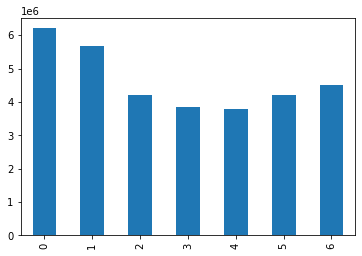

In [6]:
df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

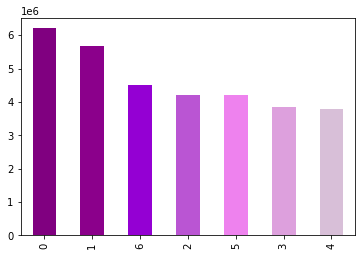

In [28]:
# Color bar graph

bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'darkmagenta', 'darkviolet', 'mediumorchid', 'violet','plum', 'thistle' ])

In [30]:
# Export bar graph

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 3. Histograms

<AxesSubplot:xlabel='prices', ylabel='prices'>

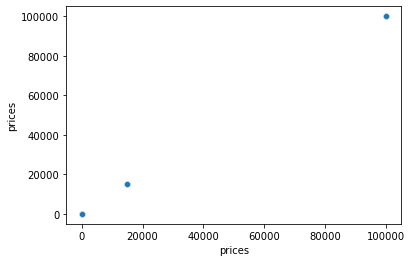

In [7]:
# Scatterplot to check for outliers

sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

In [8]:
# Check for price over 100 dollars

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

Unnamed: 0_x  product_id                      product_name  \
13100147         21554       21553  Lowfat 2% Milkfat Cottage Cheese   
13100148         21554       21553  Lowfat 2% Milkfat Cottage Cheese   
13100149         21554       21553  Lowfat 2% Milkfat Cottage Cheese   
13100150         21554       21553  Lowfat 2% Milkfat Cottage Cheese   
13100151         21554       21553  Lowfat 2% Milkfat Cottage Cheese   
...                ...         ...                               ...   
21786876         33666       33664             2 % Reduced Fat  Milk   
21786877         33666       33664             2 % Reduced Fat  Milk   
21786878         33666       33664             2 % Reduced Fat  Milk   
21786879         33666       33664             2 % Reduced Fat  Milk   
21786880         33666       33664             2 % Reduced Fat  Milk   

          aisle_id  department_id   prices  Unnamed: 0_y  order_id  user_id  \
13100147       108             16  14900.0           171    912404       17   
13100148       108             16  14900.0           181    603376       17   
13100149       108             16  14900.0          1944   3264360      135   
13100150       108             16  14900.0          1945    892534      135   
13100151       108             16  14900.0          5708    229704      342   
...            ...            ...      ...           ...       ...      ...   
21786876        84             16  99999.0       3386542   2249946   204099   
21786877        84             16  99999.0       3386544   2363282   204099   
21786878        84             16  99999.0       3391313   3181945   204395   
21786879        84             16  99999.0       3405096   2486215   205227   
21786880        84             16  99999.0       3405099   2232716   205227   

          order_number  ...     price_range_loc     busiest_day  \
13100147            12  ...  High-range product  Regularly busy   
13100148            22  ...  High-range product  Regularly busy   
13100149             2  ...  High-range product  Regularly busy   
13100150             3  ...  High-range product     Busiest day   
13100151             8  ...  High-range product  Regularly busy   
...                ...  ...                 ...             ...   
21786876            29  ...  High-range product     Busiest day   
21786877            31  ...  High-range product     Busiest day   
21786878            13  ...  High-range product  Regularly busy   
21786879             7  ...  High-range product  Regularly busy   
21786880            10  ...  High-range product     Busiest day   

                Busiest days  busiest_period_of_day  max_order  \
13100147      Regularly busy          Fewest orders         40   
13100148      Regularly busy          Fewest orders         40   
13100149      Regularly busy          Fewest orders          4   
13100150        Busiest day1          Fewest orders          4   
13100151        Busiest day2          Fewest orders         16   
...                      ...                    ...        ...   
21786876        Busiest day1          Fewest orders         39   
21786877        Busiest day1          Fewest orders         39   
21786878  Least busiest day2          Fewest orders         15   
21786879  Least busiest day2          Fewest orders         12   
21786880        Busiest day1          Fewest orders         12   

              loyalty_flag average_price       Spender Frequency_order  \
13100147  Regular customer    108.648299  High spender             5.0   
13100148  Regular customer    108.648299  High spender             5.0   
13100149      New customer   1154.792308  High spender            12.0   
13100150      New customer   1154.792308  High spender            12.0   
13100151  Regular customer    114.426619  High spender            23.0   
...                    ...           ...           ...             ...   
21786876  Regular customer   1106.743956  High spender             4.0   
217868

In [9]:
# Use NumPy to assign values over 100

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100, 'prices'] = np.nan

In [10]:
# Check for maximum to see the change

df_ords_prods_merged['prices'].max()

25.0

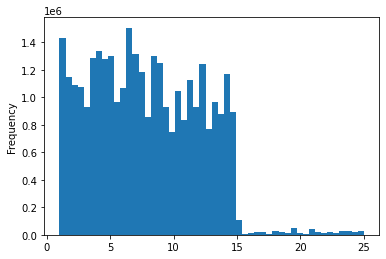

In [37]:
# Histogram

hist = df_ords_prods_merged['prices'].plot.hist(bins = 50)

In [38]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

In [12]:
# Sample to create line chart

dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [13]:
# Store 70% of sample in dataframe big

big = df_ords_prods_merged[dev]

In [14]:
# Store 30% of sample in dataframe small

small = df_ords_prods_merged[~dev]

In [15]:
df_for_line = small[['orders_day_of_week', 'prices']]

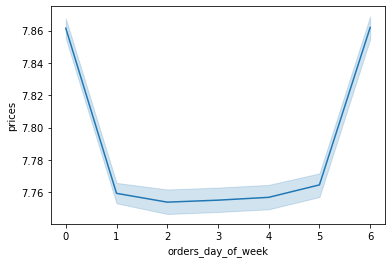

In [16]:
line = sns.lineplot(data = df_for_line, x = 'orders_day_of_week', y = 'prices')

In [39]:
# Export Line graph

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow.png'))

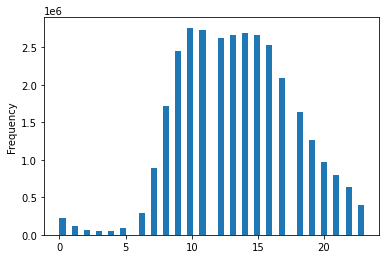

In [34]:
# 3. Histogram of orders by hour of day

hist2 = df_ords_prods_merged['order_hour_of_day'].plot.hist(bins = 50)

In [35]:
# Export histogram

hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_order_hod.png'))

More orders are between 9:00 AM to 4:00 PM, slowly decreases after until 11:00 PM, very few orders at night.

<AxesSubplot:>

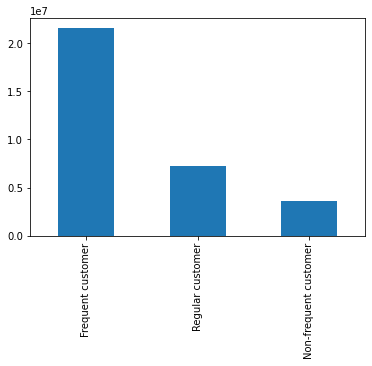

In [18]:
# 4. Bar chart on distribution of orders among customers

df_ords_prods_merged['Frequency_Flag'].value_counts().plot.bar()

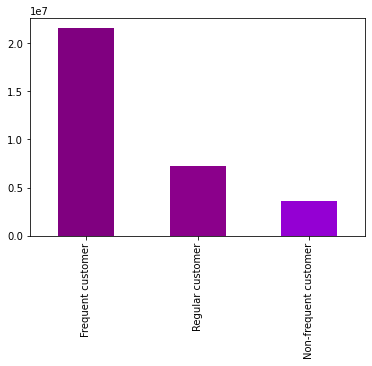

In [40]:
# Color bar graph

bar3 = df_ords_prods_merged['Frequency_Flag'].value_counts().plot.bar(color = ['purple', 'darkmagenta', 'darkviolet'])

In [41]:
# Export histogram

bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_cust.png'))

In [21]:
# 5. Line chart on orders hour of day and prices

df_for_line2 = small[['order_hour_of_day', 'prices']]

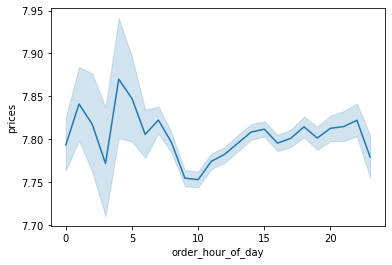

In [23]:
line2 = sns.lineplot(data = df_for_line2, x = 'order_hour_of_day', y = 'prices')

In [42]:
# Export line graph

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hod.png'))

In [24]:
# Data set Orders Products Customer Merged

df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data ', 'orders_products_customer4_9.pkl'))

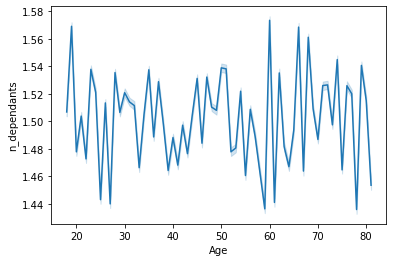

In [25]:
# 6. Line chart between Age and dependants

line3 = sns.lineplot(data = df_ords_prods_cust, x = 'Age', y = 'n_dependants')

In [43]:
# Export Line graph

line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dep.png'))

Age 20 there are more dependants, 60 to 70 as well (grand kids?), between 30 and 40 dependants are a little less than 20, 60 or 70.

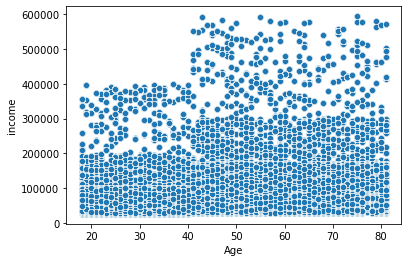

In [44]:
# Scatterplot Age and spending power

scatter = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prods_cust)

In [45]:
# Export scatter plot

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))

Spending power (income) is more for ages 40 and over.